<a href="https://colab.research.google.com/github/mehrdadkazemi254/MachineLearning/blob/main/Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We first import the [data](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home) and clean it.

For pipeline, we have to provide the list of steps. steps are tuples consisting of name and an instance of the transformer or the estimator.
the final step , in the list of steps , must be an estimator.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('melb_data.csv')
y = data['Price']
X = data.drop(['Price'], axis= 1)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 0)

categorical_cols = [cols for cols in X_train_full.columns if X_train_full[cols].dtype == 'object' and X_train_full[cols].nunique()<10]
numerical_cols = [cols for cols in X_train_full.columns if X_train_full[cols].dtype in ['int64','float64']]

my_cols = numerical_cols + categorical_cols

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

X_train.head(3)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type,Method,Regionname
12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0,u,S,Southern Metropolitan
6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0,h,SA,Western Metropolitan
8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0,h,S,Western Metropolitan


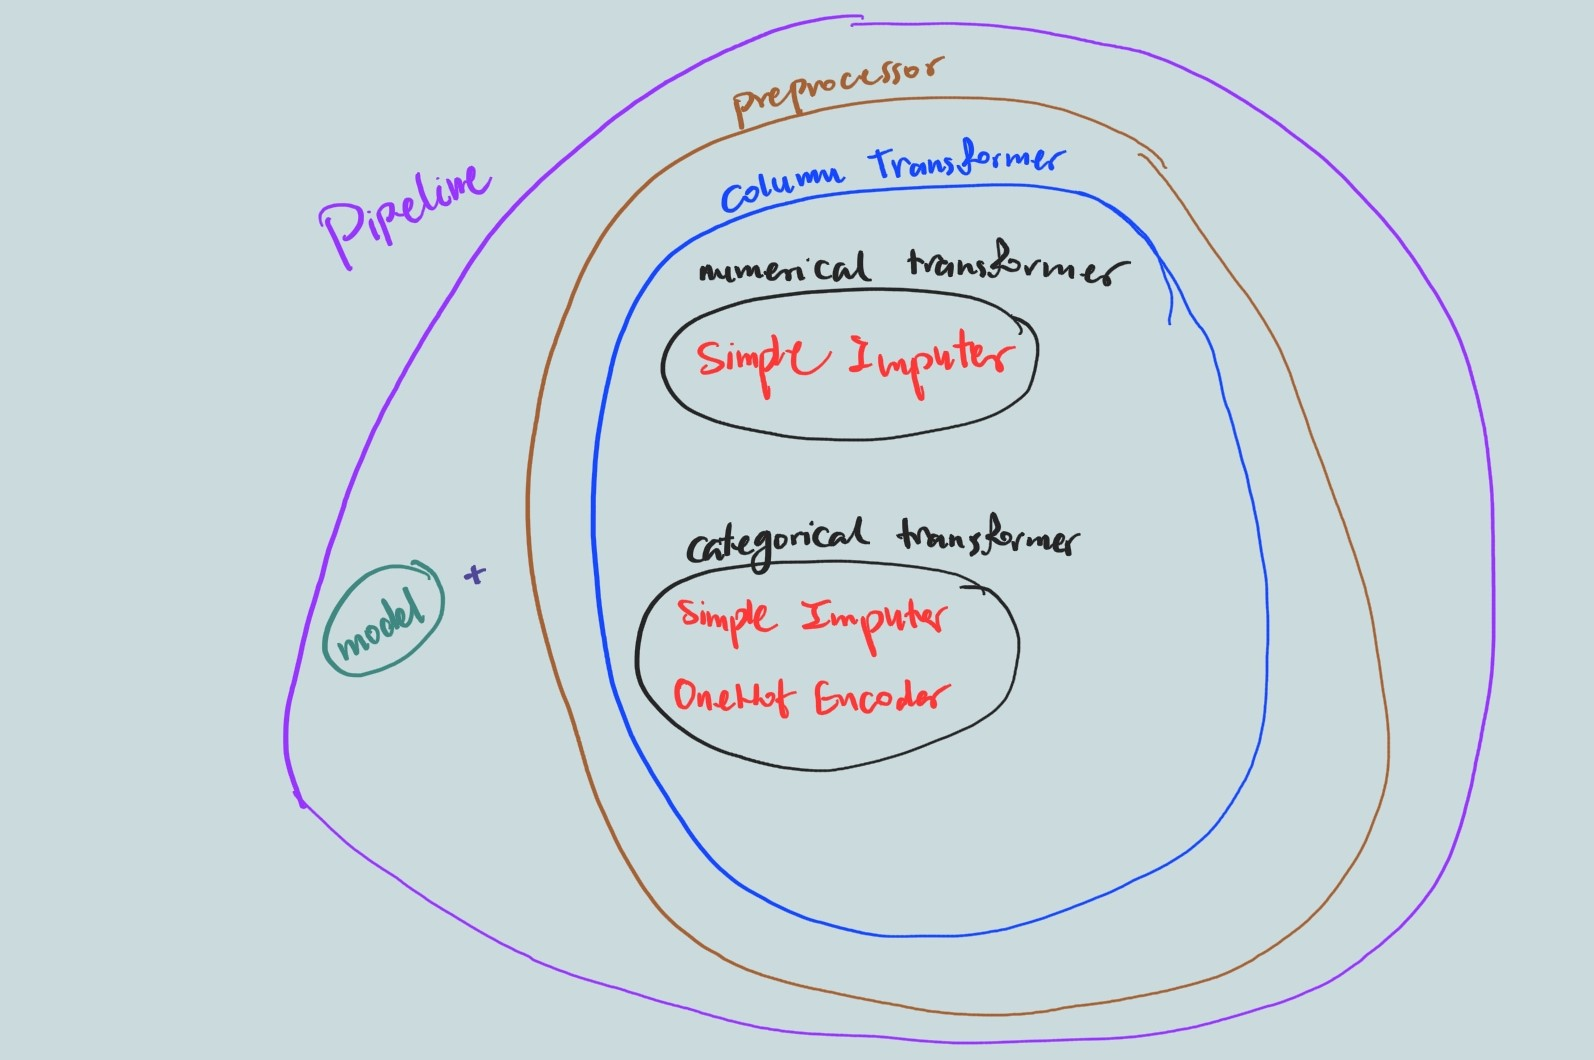

**1.Define preprocessing steps**

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numerical_transformer = SimpleImputer(strategy = 'constant')
categorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num',numerical_transformer,numerical_cols),('cat',categorical_transformer,categorical_cols)])


**2.Define the Model**

In [18]:
from sklearn.ensemble import RandomForestRegressor

my_model = RandomForestRegressor(n_estimators = 100, random_state= 0)

**3.Create and evaluate the pipeline**

In [21]:
my_pipeline = Pipeline(steps=[('preprocessor',preprocessor),('model', my_model)])

my_pipeline.fit(X_train,y_train)
my_pipeline.predict(X_valid)


array([1673192.76      ,  895763.33333333,  572680.        , ...,
       1285440.        , 1259235.        , 1077630.        ])